# **Music Recommendation System**

# **Milestone 1**

# I. Problem Definition

## The Context

For busy music listeners facing an evergrowing selection of songs to listen to, the ability to find musical content they enjoy increasingly depends on the recommendations of their music streaming app of choice. Furthermore, the success of these same apps depends on their ability to retain customers and maximize the amount of time they spend on the app, something that is primarily done by making quality song recommendations to their customers. Finally, but perhaps most importantly, the growth and development of artists is now inextricably linked to these recommendations, which allow them to find an audience of listeners that appreciate their art. For these reasons, and by extension for the health of the music industry as a whole, it is imperative that high-performing music recommendation systems exist.

## The Objectives

To construct a recommendation system that provides the top 10 songs a listener will like, with the highest possible degree of accuracy.

## The Key Questions

1. What patterns and relationships exist in the data that might help inform our approach?
2. Which techniques can we use to create an optimal recommendation system (ex: Averaging, Content-based Filtering, SVD)?
3. What might a real-world application of our recommendation system look like?

## The Problem Formulation

What kind of recommendation system, and with what features and parameters, should we use to create an accurate and useful song recommendation system?

# II. Data Exploration

## Data Description

The dataset we will use is the Taste Profile Subset released by The Echo Nest, a subset of the Million Song Dataset. It consists of two files.

The song_data file contains the following attributes:
- song_id: A unique ID given to every song
- title: Title of the song
- release: Name of the released album
- artist_name: Name of the artist
- year: Year of release

The count_data file contains the following attributes:
- user_id: A unique ID given to the user
- song_id: A unique ID given to the song
- play_count: Number of times the song was played

## Observations & Insights

In [ ]:
#Importing the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing the dataset in two separate dataframes
song_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/song_data.csv')
count_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/count_data.csv')

In [ ]:
#Previewing song_data
song_data.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


In [ ]:
#Previewing count_data
count_data.head()

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [ ]:
#Checking the info of song_data
song_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


#### Observations:
- There are 15 rows with missing titles
- There are 5 rows with missing releases

In [ ]:
#Checking for duplicates Song IDs in song_data
len(song_data['song_id'].unique())

999056

#### Observations:
- There are nearly a thousand repeated Song IDs
- We will drop the repeated rows and only keep the first appearance of each Song ID

In [ ]:
#Dropping duplicates from song_data
song_data = song_data.drop_duplicates(subset = ['song_id'])

In [ ]:
#Checking the info of count_data
count_data.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  2000000 non-null  int64 
 1   user_id     2000000 non-null  object
 2   song_id     2000000 non-null  object
 3   play_count  2000000 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


#### Observations:
- There is an extra column in the dataset that we will drop
- There are no missing values in any column

In [ ]:
#Dropping Unnamed: 0 from count_data
count_data = count_data.drop(columns = ['Unnamed: 0'])

In [ ]:
#Checking for duplicates in count_data
sum(count_data[['user_id', 'song_id']].duplicated())

0

#### Observations:
- There are no duplicate user_id/song_id pairings

In [ ]:
#Left merging count_data and song_data on song_id
df = pd.merge(count_data, song_data, on = 'song_id', how = 'left')

In [ ]:
#Previewing the merged dataframe
df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [ ]:
#Finding the number of songs each user has listened to
user_dict = dict()
for y in range(0, len(df)):
    if df['user_id'][y] in user_dict:
        user_dict[df['user_id'][y]] += 1
    else:
        user_dict[df['user_id'][y]] = 1

#### Observations:
- There are many users who have listened to very few songs
- We will limit our dataset to only those users who have listened to at least 50 different songs

In [ ]:
#Using the user_dict dictionary to filter df to only include those users who have listened to at least 50 different songs
remove_users = []
for user, count in user_dict.items():
    if count < 50:
        remove_users.append(user)
df = df.loc[~df['user_id'].isin(remove_users)]
df = df.reset_index(drop = True)

In [ ]:
#Finding the number of users who have listened to each song
song_dict = dict()
for y in range(0, len(df)):
    if df['song_id'][y] in song_dict:
        song_dict[df['song_id'][y]] += 1
    else:
        song_dict[df['song_id'][y]] = 1

#### Observations:
- There are many songs that have been listened to by very few users
- We will limit our dataset to only those songs that have been listened to by at least 100 users

In [ ]:
#Using the song_dict dictionary to filter df to only include those songs that have been listened to by at least 100 different users
remove_songs = []
for song, count in song_dict.items():
    if count < 100:
        remove_songs.append(song)
df = df.loc[~df['song_id'].isin(remove_songs)]
df = df.reset_index(drop = True)

In [ ]:
#Removing rows with value of 0 for year
df = df[df['year'] != 0]
df = df.reset_index(drop = True)

In [ ]:
len(df)

416413

**Observations:**
- Removing 85,665 rows that have a value of 0 for year
- We are left with 416,413 rows

In [ ]:
#Applying label encoding for user_id and song_id
label_encoder = preprocessing.LabelEncoder()

df['user_id']= label_encoder.fit_transform(df['user_id'])
df['song_id']= label_encoder.fit_transform(df['song_id'])

## Exploratory Data Analysis

Exploring our final dataset:

In [ ]:
#Retrieving the number of users, songs and artists in our dataset
print('Number of users:', len(df['user_id'].unique()))
print('Number of songs:', len(df['song_id'].unique()))
print('Number of artists:', len(df['artist_name'].unique()))

Number of users: 10007
Number of songs: 1964
Number of artists: 659


In [ ]:
#Finding the users who have listened to the most songs
user_dict2 = dict()
for y in range(0, len(df)):
    if df['user_id'][y] in user_dict2:
        user_dict2[df['user_id'][y]] += 1
    else:
        user_dict2[df['user_id'][y]] = 1

for key, value in sorted(user_dict2.items(), key=lambda x: x[1], reverse=True)[0:5]:
    print('User:', key)
    print('Plays:', value, '\n')

User: 9826
Plays: 392 

User: 8061
Plays: 342 

User: 4175
Plays: 325 

User: 1402
Plays: 312 

User: 4296
Plays: 304 



In [ ]:
#Finding the songs played by the most users
song_dict2 = dict()
for y in range(0, len(df)):
    if df['song_id'][y] in song_dict2:
        song_dict2[df['song_id'][y]] += 1
    else:
        song_dict2[df['song_id'][y]] = 1

for key, value in sorted(song_dict2.items(), key=lambda x: x[1], reverse=True)[0:5]:
    for y in range(0, len(df)):
        if df['song_id'][y] == key:
            print('Song:', df['title'][y])
            print('Users:', value, '\n')
            break

Song: Secrets
Users: 1925 

Song: Revelry
Users: 1806 

Song: Undo
Users: 1751 

Song: Use Somebody
Users: 1723 

Song: Fireflies
Users: 1624 



In [ ]:
#Number of plays by year of release of song
df.groupby('year').sum()['play_count'].tail()

year
2006     86906
2007    120516
2008    133119
2009    140078
2010     53730
Name: play_count, dtype: int64

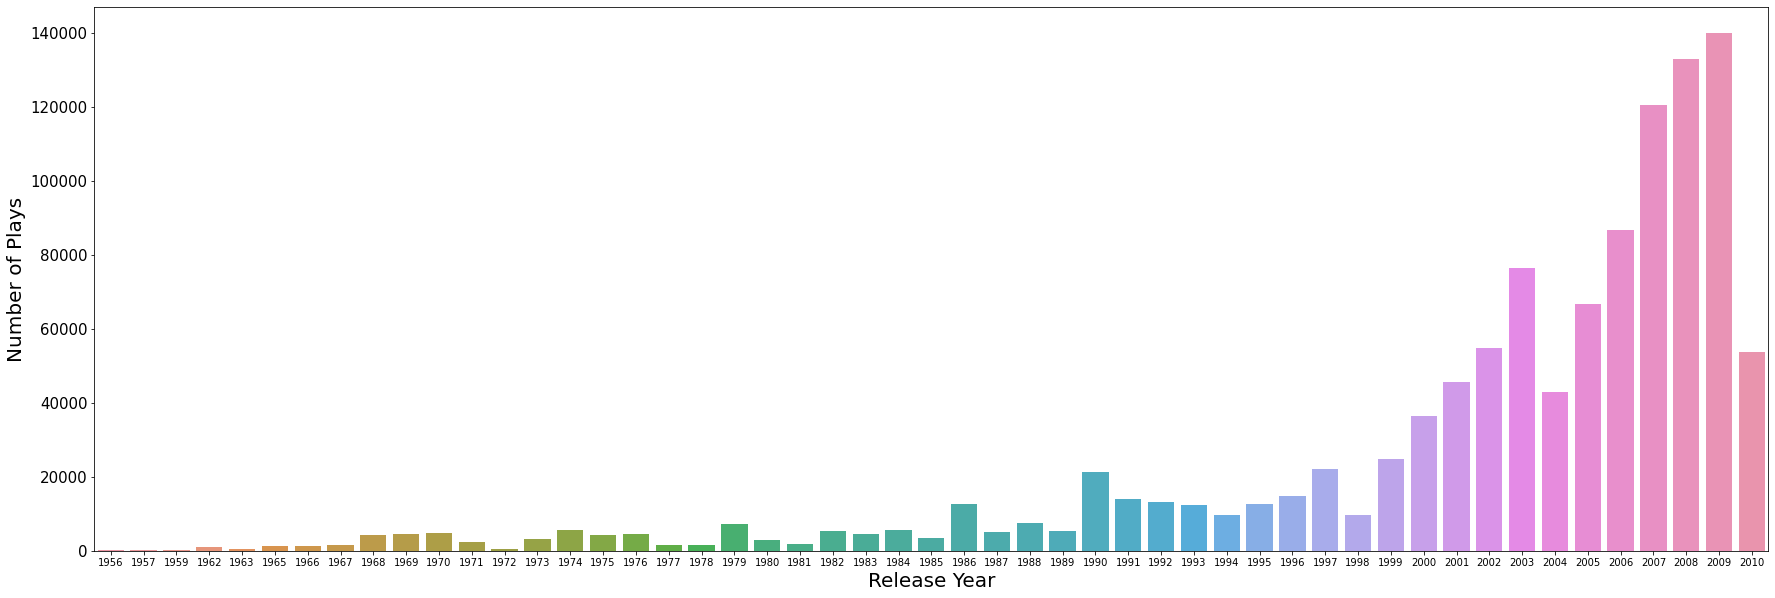

In [ ]:
#Plotting the number of plays by year of release of song
plt.figure(figsize=(30,10))
sns.barplot(x = df.groupby('year').sum().index, y = 'play_count', data = df.groupby('year').sum())
plt.ylabel('Number of Plays', fontsize = 20) 
plt.xlabel('Release Year', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

#### Observations:
- A significant number of rows have a value of 0 for year
- Otherwise most plays seem to be for songs released in the 2000s

# III. Proposed Approach

## Potential Techniques

Various types of recommendation systems should be created and tested to find the most effective solution. Types of recommendation systems to test include:
- Rank Based Recommendation System
- Collaborative Filtering Based Recommendation System
- Model Based Collaborative Filtering Recommendation System

## Overall Solution Design

We will create each of the recommendation systems listed above in the given order, testing the effectiveness of each and tuning as needed based on the key performance indicators listed below. We will primarily be using the Surprise and Scikit-learn packages to do so.

## Measures of Success

The metrics we will be monitoring include:

**Precision** - The fraction of recommended songs that are relevant to the user

**Recall** - The fraction of relevant songs that are recommended to the user

**F1-Score** - The harmonic mean of the Precision and Recall

As both Precision and Recall are important in this situation, we will use the F1-Score as our primary performance metric.

# **Milestone 2**

# I. Rank Based Recommendation System

We will use a song's average number of plays per user as an indicator of its popularity, and build a recommendation system that suggests the top 10 most popular songs that meet a minimum threshold for number of users that have listened to it.

In [ ]:
#Creating a dataframe with song_id as index and columns for the average number of plays per user and number of users who have listened
average_plays = df.groupby('song_id').mean()['play_count']

count_users = df.groupby('song_id').count()['user_id']

final_plays = pd.DataFrame({'average_plays': average_plays, 'count_users': count_users})

final_plays = final_plays.sort_values(by = 'average_plays', ascending = False)

final_plays.head()

,average_plays,count_users
song_id,,
788,11.496815,157
1645,8.479310,290
120,8.416563,1606
72,7.954286,175
1154,7.547170,106


In [ ]:
#Defining a function to get the top n songs based on highest average plays and minimum count of users
def top_n_songs(final_plays, n, minimum_users):
    recommendations = final_plays[final_plays['count_users'] >= minimum_users]
    recommendations = recommendations.sort_values(by = 'average_plays', ascending = False)
    rec_list = list(recommendations.index[0:n])
    for x in rec_list:
        for y in range(0, len(df)):
            if df['song_id'][y] == x:
                print(df['title'][y])
                break

In [ ]:
#Using our function to recommend the top 10 songs based on popularity with a minimum of 100 users/listeners
top_n_songs(final_plays, 10, 100) 

Call It Off (Album Version)
The Big Gundown
You're The One
Oceanside
Here_ There And Everywhere
Undo
Something (Album Version)
Save Room
Forgive Me
Rio


We have successfully constructed a rudimentary recommendation system that suggests songs based on their popularity. However, this does not provide individualized suggestions for each user.

# II. Collaborative Filtering Based Recommendation System

To provide individualized suggestions we will next attempt to create and tune two types of collaborative filtering based recommendation systems - one user user based and one item item based. We will use the Surprise library to do this.

In [ ]:
#Installing the Surprise library
!pip install surprise

     |████████████████████████████████| 11.8 MB 5.4 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1630154 sha256=9560061ac0e27ea86a94f63f27a89a1d917ed1538e2598f88392b7a85d8349b4
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
#Installing the necessary Suprise classes and functions
from surprise import accuracy
from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise.model_selection import GridSearchCV
from surprise.model_selection import train_test_split
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.model_selection import KFold
from surprise import CoClustering

In [ ]:
#Also importing defaultdict to create a dictionary output that does not raise a key error
from collections import defaultdict

We will create a function that will take a recommendation model as an input and return its precision@k and recall@k, with k being the number of top suggested songs taken under consideration and threshold being the minimum number of times a user is predicted to play a song for it to be relevant. We will start by assigning k=10 as we are looking to suggest 10 songs per user, and threshold=1.5 as this would mean a user is expected to listen to a song more than once in order for it to be relevant.


In [ ]:
#Creating a function that will return the precision@k and recall@k, and compute the F_1 score
def precision_recall_at_k(model, k=10, threshold=1.5):

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    
    # Making predictions on the test data
    predictions=model.test(testset)
    
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user play counts by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant songs
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended songs in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended songs in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended songs that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant songs that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    
    # Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)),3)
    # Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)),3)
    
    accuracy.rmse(predictions)
    print('Precision: ', precision) # Command to print the overall precision
    print('Recall: ', recall) # Command to print the overall recall
    print('F_1 score: ', round((2*precision*recall)/(precision+recall),3)) # Formula to compute the F-1 score.

In [ ]:
# instantiating Reader scale with expected rating scale
reader = Reader(rating_scale=(1, 879))

# loading the rating dataset
data = Dataset.load_from_df(df[['user_id', 'song_id', 'play_count']], reader)

# splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

We will start by constructing a user user similarity-based collaborative filtering recommendation system.

In [ ]:
#Declaring the similarity options.
sim_options = {'name': 'cosine',
               'user_based': True}

#Initialize the KNNBasic model using sim_options provided, Verbose=False, and setting random_state=1
sim_user_user = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1)

# Fit the model on the training data
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score
precision_recall_at_k(sim_user_user)

RMSE: 6.0488
Precision:  0.44
Recall:  0.761
F_1 score:  0.558


**Observations:**
- Our baseline model returns an RMSE of 6.0488 and an F_1 score of 0.558

Now we will see if we can improve on our above results by tuning our model. We will use GridSearchCV to find the optimal parameters.

In [ ]:
# setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9], 'sim_options': {'name': ["cosine",'pearson',"pearson_baseline"], 'user_based': [True], "min_support":[2,4]}}

# performing 3-fold cross validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=1)

# fitting the data
gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...

In [ ]:
# using the optimal similarity measure for user-user based collaborative filtering
sim_options = {'name': 'pearson_baseline', 'user_based': True, 'min_support': 2}

# creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options=sim_options, k=30, min_k=9, random_state=1, verbose=False)

# training the algorithm on the trainset
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k =10.
precision_recall_at_k(sim_user_user_optimized)

RMSE: 5.9675
Precision:  0.459
Recall:  0.757
F_1 score:  0.571


**Observations:**
- Tuning our model has improved its overall performance as compared to the baseline model
- Most crucially our F_1 score increased from 0.558 to 0.571

Next we will construct an item item similarity-based collaborative filtering recommendation system and compare this to our previous model.

In [ ]:
#Declaring the similarity options.
sim_options = {'name': 'cosine',
               'user_based': False}

#KNN algorithm is used to find desired similar items.
sim_item_item = KNNBasic(sim_options=sim_options, random_state=1, verbose=False)

# Train the algorithm on the trainset, and predict ratings for the testset
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k =10.
precision_recall_at_k(sim_item_item)

RMSE: 5.8570
Precision:  0.394
Recall:  0.648
F_1 score:  0.49


**Observations:**
- Our baseline item item similarity-based recommendation model performs worse than our user user similarity-based model
- The F_1 score has declined from 0.571 for our tuned user user model to 0.49 for our baseline item item model

Once again we will use GridSearchCV to find the optimal parameters for our model.

In [ ]:
# setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9], 'sim_options': {'name': ["cosine",'pearson',"pearson_baseline"], 'user_based': [False], "min_support":[2,4]}}

# performing 3-fold cross validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# fitting the data
gs.fit(data)

# Find the best RMSE score
print(gs.best_score['rmse'])

# Find the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

4.932206004443555
{'k': 30, 'min_k': 6, 'sim_options': {'name': 'pearson_baseline', 'user_based': False, 'min_support': 2}}


In [ ]:
# using the optimal similarity measure for item-item based collaborative filtering
sim_options = {'name': 'pearson_baseline', 'user_based': False, 'min_support': 2}

# creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options = sim_options , k = 30 , min_k = 6 , random_state=1, verbose=False)

# training the algorithm on the trainset
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k and recall@k, f1_score@k and RMSE
precision_recall_at_k(sim_item_item_optimized)

RMSE: 5.8512
Precision:  0.458
Recall:  0.662
F_1 score:  0.541


**Observations:**
- While we have achieved our lowest RMSE yet, our tuned item item similarity-based model still does not perform as well as the user user similarity-based model in terms of our key F_1 score metric

# III. Model Based Collaborative Filtering Recommendation System

To provide more personalized recommendations to our users we will next try Model-based Collaborative Filtering. Here we will use latent features to make recommendations based on a user's past behavior, computing these latent features using Singular Value Decomposition (SVD).

In [ ]:
# using SVD matrix factorization
svd = SVD(random_state=1)

# training the algorithm on the trainset
svd.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score@k, and RMSE
precision_recall_at_k(svd)

RMSE: 876.3079
Precision:  0.428
Recall:  0.795
F_1 score:  0.556


**Observations:**
- Our RMSE has increased dramatically with this baseline model
- Our F_1 score is only slightly lower than that of our tuned user user model however

We will tune our model to see if we can minimize RMSE while increasing our F_1 score.

In [ ]:
# set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01], 'reg_all': [0.2, 0.4, 0.6]}

# performing 3-fold gridsearch cross validation
gs_ = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# fitting data
gs_.fit(data)

# best RMSE score
print(gs_.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs_.best_params['rmse'])

4.840863431992655
{'n_epochs': 30, 'lr_all': 0.001, 'reg_all': 0.2}


In [ ]:
# Build the optimized SVD model using optimal hyperparameter search
svd_optimized = SVD(n_epochs = 30, lr_all = 0.001, reg_all = 0.2, random_state = 1)

# Train the algorithm on the trainset
svd_optimized=svd_optimized.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score@k, and RMSE
precision_recall_at_k(svd_optimized)

RMSE: 5.7867
Precision:  0.442
Recall:  0.776
F_1 score:  0.563


**Observations:**
- We have greatly decreased our RMSE and increased our F_1 score
- Despite this, the F_1 score is still lower than that of our tuned user user model

# Predictions and Recommendations

As our tuned user user similarity-based model has performed the best we will use it to make some predictions below.

In [ ]:
#Using our model to predict the play_count for user_id 7160 and song_id 17, a song this user has listened to 3 times
sim_user_user_optimized.predict(7160, 17, r_ui=3, verbose=True)

user: 7160       item: 17         r_ui = 3.00   est = 3.48   {'actual_k': 30, 'was_impossible': False}


Prediction(uid=7160, iid=17, r_ui=3, est=3.476715309343607, details={'actual_k': 30, 'was_impossible': False})

In [ ]:
#Using our model to predict the play_count for user_id 7160 and song_id 9, a song this user has not listened to
sim_user_user_optimized.predict(7160, 9, verbose=True)

user: 7160       item: 9          r_ui = None   est = 3.38   {'actual_k': 11, 'was_impossible': False}


Prediction(uid=7160, iid=9, r_ui=None, est=3.376496586029605, details={'actual_k': 11, 'was_impossible': False})

**Observations:**
- In our first prediction above we can see that our model was fairly accurate
- Our model predicted that user 7160 would listen to song 17 3.48 times, in reality they listened 3

Next we will use our model to make some song recommendations. We will first create a function to help facilitate this.

In [ ]:
def get_recommendations(data, user_id, top_n, algo):
    
    # creating an empty list to store the recommended song ids
    recommendations = []
    
    # creating a user song interactions matrix 
    user_song_interactions_matrix = data.pivot(index='user_id', columns='song_id', values='play_count')
    
    # extracting those song ids which the user_id has not interacted yet
    non_interacted_songs = user_song_interactions_matrix.loc[user_id][user_song_interactions_matrix.loc[user_id].isnull()].index.tolist()
    
    # looping through each of the song ids which user_id has not interacted yet
    for song_id in non_interacted_songs:
        
        # predicting the play count for those non interacted song ids by this user
        est = algo.predict(user_id, song_id).est
        
        # appending the predicted plays
        recommendations.append((song_id, est))

    # sorting the predicted plays in descending order
    recommendations.sort(key=lambda x: x[1], reverse=True)

    return recommendations[:top_n] # returing top n highest predicted played songs for this user

Next we will use this function to get the top 10 suggested songs for user 7160.

In [ ]:
#Getting top 10 suggested songs for user_id 7160
sim_user_user_optimized_recommendations = get_recommendations(df, 7160, 10, sim_user_user_optimized)

In [ ]:
#Building the dataframe for above recommendations with columns "song_id" and "predicted_plays"
pd.DataFrame(sim_user_user_optimized_recommendations, columns=['song_id', 'predicted_plays'])

,song_id,predicted_plays
0,717,17.875927
1,642,14.482218
2,1184,12.886756
3,1729,9.533550
4,1302,9.060616
5,561,8.529942
6,1567,8.293340
7,1343,7.944882
8,1065,7.653844
9,120,7.479701


Now we will create a function to correct these play counts and rank these songs. We will do so because it is not only the play count that describes the likelihood of a user to listen to a song, but also the number of users who have listened to it. To incorporate this into our recommendations we will subtract 1/sqrt(n) from the predicted plays of each song, where n is the number of users who have listened to it.

In [ ]:
def ranking_songs(sim_user_user_optimized_recommendations, final_plays):
  # sort the songs based on play_count
  ranked_songs = final_plays.loc[[song[0] for song in sim_user_user_optimized_recommendations]].sort_values('count_users', ascending=False)[['count_users']].reset_index()

  # merge with the recommended songs to get predicted plays
  ranked_songs = ranked_songs.merge(pd.DataFrame(sim_user_user_optimized_recommendations, columns=['song_id', 'predicted_plays']), on='song_id', how='inner')

  # rank the songs based on corrected plays
  ranked_songs['corrected_plays'] = ranked_songs['predicted_plays'] - 1 / np.sqrt(ranked_songs['count_users'])

  # sort the songs based on corrected plays
  ranked_songs = ranked_songs.sort_values('corrected_plays', ascending=False)
  
  return ranked_songs

In [ ]:
#Ranking songs based on above recommendations
ranking_songs(sim_user_user_optimized_recommendations, final_plays).reset_index(drop = True)

,song_id,count_users,predicted_plays,corrected_plays
0,717,395,17.875927,17.825612
1,642,200,14.482218,14.411508
2,1184,243,12.886756,12.822605
3,1729,110,9.533550,9.438204
4,1302,120,9.060616,8.969329
5,561,185,8.529942,8.456420
6,1567,190,8.293340,8.220793
7,1343,175,7.944882,7.869289
8,1065,229,7.653844,7.587763
9,120,1606,7.479701,7.454748


In [ ]:
#Printing rank, song title and artist name for these recommendations
recommendation_results = ranking_songs(sim_user_user_optimized_recommendations, final_plays).reset_index(drop = True)

for x in range(0, len(recommendation_results)):
  for y in range(0, len(df)):
    if recommendation_results['song_id'][x] == df['song_id'][y]:
      print(x+1, df['title'][y], 'by', df['artist_name'][y])
      break

1 Me & Mr Jones by Amy Winehouse
2 Doperide by Saliva
3 Red Right Ankle by The Decemberists
4 EMCEE Murdah by K-OS
5 Lady (Hear Me Tonight) by Modjo
6 Where I Stand by Days Of The New
7 Not In Love by Crystal Castles
8 Boys Will Be Boys by The Ordinary Boys
9 Reason I'm Alive (Explicit) by Drowning Pool
10 You're The One by Dwight Yoakam


# Conclusions and Recommendations

## Refined Insights


**Average Play Count**

Upon further analysis of the dataset I discovered that the average play count for a user/song combination was rather low at only 2.68. This had great implications when trying to decide on a play count threshold for song relevance. As many users have a habit of only listening to songs a few times, I decided to set my threshold at 1.5 in order to broaden the definition of what a relevant song is.

**Additional Data on Users and Songs**

While our dataset did contain columns we ultimately did not use such as year, song title, release and artist name, if provided with additional data on users and songs in the future we can continue to construct more and more advanced models that may provide better recommendations. In this instance we did not have any personal data on the users, or consequential descriptive data on the songs themselves, so this was not an option.

## Comparison of Various Techniques and their Relative Performance

Using our key F_1 score metric to assess our results our tuned user user similarity-based collaborative filtering recommendation system performed the best with an F_1 score of 0.571. With that being said, our other tuned models were not far behind, with both the item item similarity-based collaborative filtering recommendation system and the model-based collaborative filtering recommendation system having F_1 scores greater than 0.5. Our model-based collaborative filtering recommendation system also had the distinction of having the lowest RMSE at 5.7867.

Moving forward we can continue to hone these models and create new ones to improve performance. The ability to acquire more descriptive data on our users and songs could help in this endeavour, giving us more information with which to cluster and make informed recommendations. 

## Proposal for the Final Solution Design

Per the above results, I recommend that a user user similarity-based recommendation system be implemented to suggest songs to users. As the model with the highest F_1 score it is the most likely to suggest songs that users will enjoy listening to and play multiple times.

Per our findings, the below parameters should be used in this model:


*   Similarity Measure: Pearson Baseline
*   Max K: 30
*   Min K: 9
*   Min Support: 2



